# Neural Networks

Neural networks are the basic building blocks of deep learning algorithms. A neural network is a type of machine learning algorithm designed to simulate the behaviour of the human brain. It is made up of interconnected nodes, also known as artificial neurons, organised into layers.

Neural networks are a type of machine learning algorithm, but they differ from traditional machine learning in several key ways. Most importantly, neural networks learn features directly from the data, making them better suited to large datasets. On the other hand, in traditional machine learning, features are provided manually.

The basic element of a neural network is a neuron. Neurons are organised into layers, which can be stacked one on top of the other. The first layer is the input layer, the last layer is the output layer, and each layer in between is called a hidden layer.

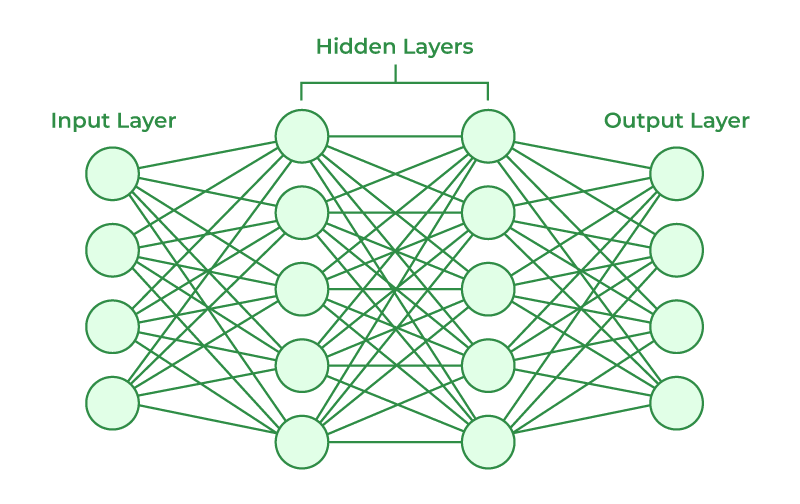

The basic functioning of a Neural Network is the following:



1.   Fed input data into the network.
2.   Flow data layer by layer from input to output.
3.   Calculate the error of the network based on the computed output.
4.   Adjust the weights according to the gradient.
5.   Iterate until convergence / stopping criteria

# 🧠 Linear layer

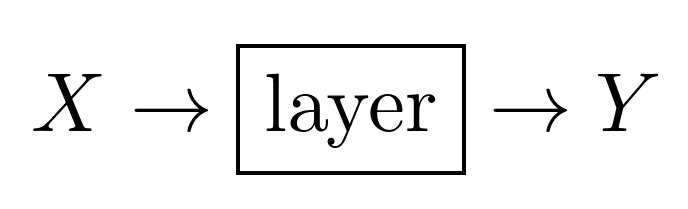

Regardless of the architecture of the layers, each layer in a neural network should give an output ($Y$) given an input ($X$). In this section we will discuss the simplest possible layer, which implements a linear function:

$Y = W * X + B$, where $W$ and $B$ are the learnable parameters of the layers: weights and biases.

This kind of layer is the basic building block of a Feed Forward Neural Network.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 🔢 Coding

In [2]:
class FCLayer:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.weights = np.random.randn(input_size, output_size)
        self.bias = np.random.randn(1, output_size)

    def forward(self, input):
        self.input = input
        return np.dot(input, self.weights) + self.bias

In [3]:
example = np.random.randn(100, 10)

layer = FCLayer(10, 1)
out = layer.forward(example)

for i in range(10):
  print("Input = ", example[i], " - Output = ", out[i])
  print()

Input =  [-0.2252545  -0.15641001 -1.70355148 -0.54940243 -1.00859822  0.70550818
 -1.87659912 -0.55686185 -0.99548728 -0.62520768]  - Output =  [-0.36545861]

Input =  [-0.50340418  0.1508249  -0.74704804  0.23491524 -0.80080423 -0.26505761
  1.81889496 -0.10319318 -0.18772917 -0.54432572]  - Output =  [1.59018262]

Input =  [-1.19371314  1.58372145  0.70470815  0.13765142 -1.51321529  0.04364111
  0.38610283 -0.91971374 -0.74338262 -0.39627178]  - Output =  [2.50165901]

Input =  [-0.02829942  0.94836885 -0.90623984  0.51162232  0.93322795 -0.73956821
 -0.85666565 -1.67874734 -1.06536606 -0.68192423]  - Output =  [2.6520964]

Input =  [ 1.06129448 -0.4009055   0.17214531 -0.69155168  0.072524    0.37135942
  1.11060663  2.04263096 -0.03456316  0.90508512]  - Output =  [3.3885485]

Input =  [-0.61808399 -0.59874993  0.29873434 -0.30475214  0.99469979 -0.87844644
  2.21610768  1.97291574 -0.32201286 -0.0207346 ]  - Output =  [1.13684527]

Input =  [ 1.31002724 -0.5990541   0.43702385 -

### 📊 Plot

Plot the output with respect to the input: it follow a linear shape.

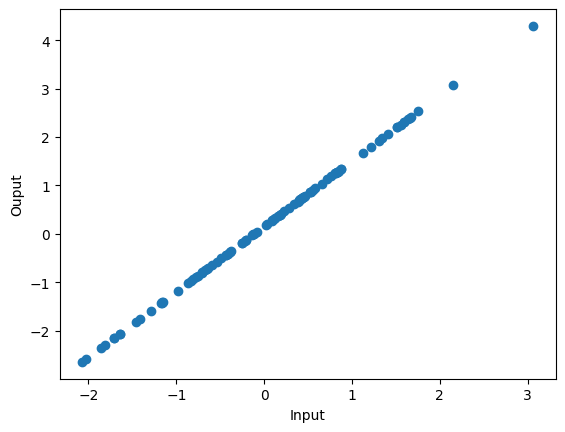

In [4]:
example = np.sort(np.random.randn(100, 1))
layer = FCLayer(1, 1)
out = layer.forward(example)

out_ordered = layer.forward(example)
plt.scatter(example, out_ordered)
plt.xlabel("Input")
plt.ylabel("Ouput")
plt.show()

# 📈 Activation functions

Activation functions introduce non-linearities into the process. There are many different activation functions in the literature. Usually, some of the functions are mainly used in the hidden layers and some of them for the output layers.

In this section we introduce three of them:

*   $ReLU(x) = max(0,x)$
*   $tanh(x) = \frac{e^x - e^{-x}}{e^x+e^{-x}}$
*   $sigmoid(x) = \frac{1} {1 + x}$



In [5]:
import numpy as np
import matplotlib.pyplot as plt

### 🔢 Coding: add the activation function to the layer 🧠📈



In [6]:
class FCLayer:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.weights = np.random.randn(input_size, output_size)
        self.bias = np.random.randn(1, output_size)

    def forward(self, input):
        self.input = input
        return np.dot(input, self.weights) + self.bias

In [7]:
class ActivationLayer:
    def __init__(self, activation):
        self.activation = activation

    def forward(self, input):
        self.input = input
        return self.activation(input)

### 🔢 Coding: activation functions 📈


In [8]:
def relu(x):
    return np.maximum(x, 0)

def tanh(x):
    return np.tanh(x)

def sigmoid(x):
    v = np.nan_to_num(np.exp(-x))
    return 1 / (1 + v)

### 📊 Plot

Plot the shape of the different activation functions.

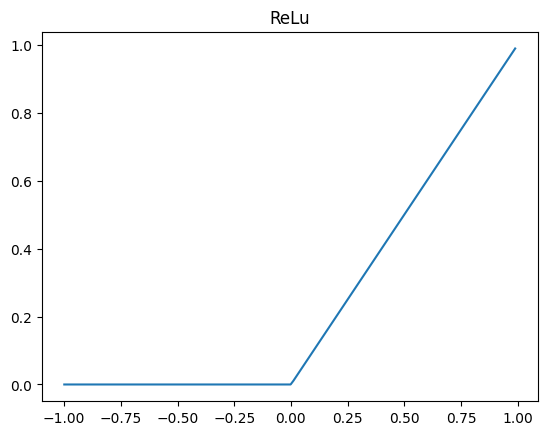

In [9]:
x = np.random.uniform(-1, +1, 100)

x = np.sort(x)

plt.plot(x, relu(x))
plt.title("ReLu")
plt.show()

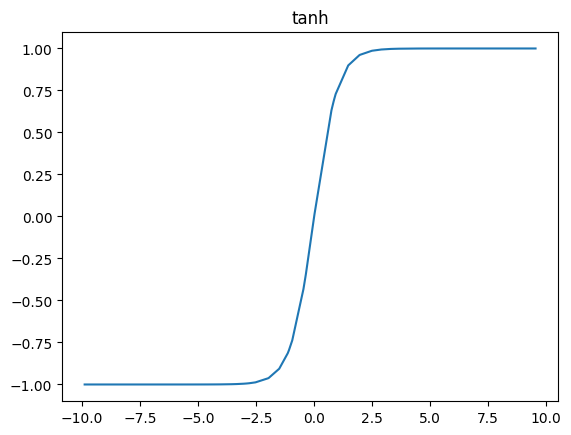

In [10]:
x = np.random.uniform(-10, +10, 100)
x = np.sort(x)
plt.plot(x, tanh(x))
plt.title("tanh")
plt.show()

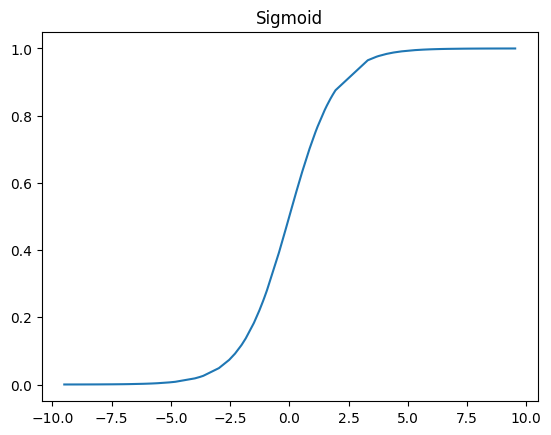

In [11]:
x = np.random.uniform(-10, +10, 100)

x = np.sort(x)

plt.plot(x, sigmoid(x))
plt.title("Sigmoid")
plt.show()

### ❗ Pay attention to the y-axis of the two functions!

In [12]:
example = np.random.randn(100, 10)

linear_layer = FCLayer(10, 1)
act_function = ActivationLayer(relu)

out = linear_layer.forward(example)
out = act_function.forward(out)

for i in range(10):
  print("Input = ", example[i], " - Output = ", out[i])
  print()

Input =  [ 0.78008859  1.00726095 -2.82621822  0.28578205 -0.62165453  0.41846816
 -0.03885897  0.01953171  0.6900424  -0.07658066]  - Output =  [0.71200239]

Input =  [-0.42948499 -0.8663109  -0.29501065  0.15543334  0.84311681  0.42294531
  0.61540168  1.01564809  1.81541344 -0.78313657]  - Output =  [0.]

Input =  [ 2.24133256  1.88880983 -0.579068    0.29672531  0.59648314 -0.36030887
 -1.20480437 -2.17551838  1.13386238  0.50384813]  - Output =  [0.85663845]

Input =  [-0.4184802  -0.71089986 -1.26060908  0.61850012 -0.62658995  1.66684335
 -0.08586839  0.09889914 -0.06383542 -0.04677036]  - Output =  [1.20812269]

Input =  [-0.45485629  0.24280938  0.21607735 -2.5446097  -0.9694431  -0.9952309
 -0.05402925 -3.19790095  0.36911044 -0.14730242]  - Output =  [0.]

Input =  [ 0.06640975  0.3030413  -0.83203458 -0.39425098 -0.88549437  0.26089558
 -0.79272011 -0.23422016 -0.60874365 -0.16337077]  - Output =  [0.05237133]

Input =  [ 0.42711486  0.68110906 -0.55698169  0.07386941  1.44

### 📊 Plot

Plot the results of a single layer to see the shape of the output with respect to the input.

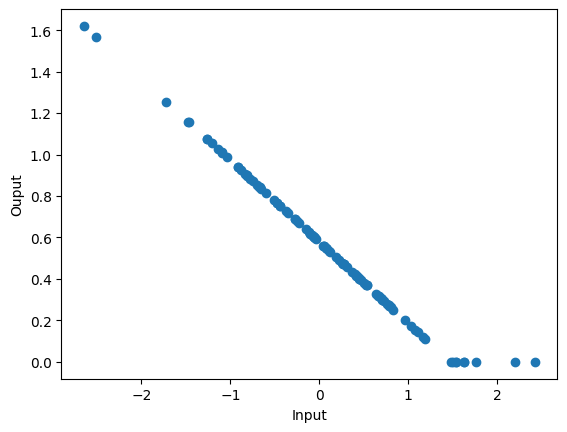

In [15]:
example = np.random.randn(100, 1)
layer = FCLayer(1, 1)
act_function = ActivationLayer(relu)

out = layer.forward(example)
out = act_function.forward(out)

plt.scatter(example, out)
plt.xlabel("Input")
plt.ylabel("Ouput")
plt.show()

# 🍔 Stack multiple layers

The easiest way to increase the expressivity of the network, especially when dealing with complex data, is to build the network as a combination of the following layers.
When do so, each neuron of one layer is connected to each neuron of the following layer.
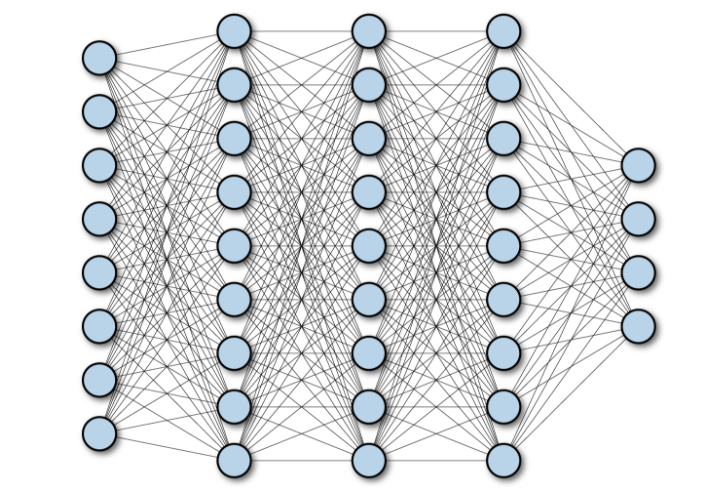

The output of one layer is the input of the following layer, this idea is known as: **Forward Step**.

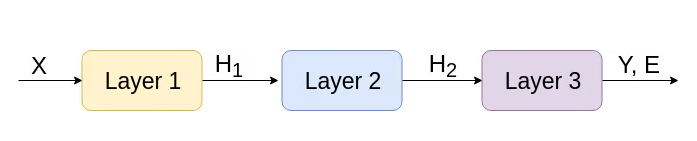

In this section we will create a Neural Network as combination of multiple layers with different activation function and the output of the network changes.

### Useful functions

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
class FCLayer:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.weights = np.random.randn(input_size, output_size)
        self.bias = np.random.randn(1, output_size)

    def forward(self, input):
        self.input = input
        return np.dot(input, self.weights) + self.bias

class ActivationLayer:
    def __init__(self, activation):
        self.activation = activation

    def forward(self, input):
        self.input = input
        return self.activation(input)

def relu(x):
    return np.maximum(x, 0)
def tanh(x):
    return np.tanh(x)

### 🔢 Coding: Neural network class 🍔

In [18]:
class Network():
  def __init__(self):
        self.layers = []

  def add(self, layer):
      self.layers.append(layer)

  def predict(self, input_data):
      samples = len(input_data)
      result = []

      for i in range(samples):
          output = input_data[i]
          for layer in self.layers:
              output = layer.forward(output)
          result.append(output)

      return result

In [19]:
example = np.random.randn(100, 64)

network = Network()

network.add(FCLayer(64, 32))
network.add(ActivationLayer(relu))
network.add(FCLayer(32, 16))
network.add(ActivationLayer(relu))
network.add(FCLayer(16, 1))
network.add(ActivationLayer(relu))

out = network.predict(example)

for i in range(10):
  print("Input = ", example[i], " - Output = ", out[i])
  print()

Input =  [-1.15215234 -1.7417761   1.23554798 -1.07082911  1.54293626  1.14337968
 -0.32222256  0.89892246  1.48957134  0.59489967 -1.72306213  0.88026956
 -1.30907905  1.73705437 -0.52527357 -1.58756508  0.70898553  1.51978427
 -1.48885963 -1.33521532  3.22638607 -1.5203541   0.8124759   0.74866397
 -1.02132045  0.85615442  1.41243428  1.21728119 -1.1381707  -1.3145857
  2.04790208  0.31821252  0.21129869 -0.63207444 -0.61476825 -0.7803185
 -0.43193935 -0.41980143 -0.80303061  2.04765229 -1.63091832 -1.41874577
  0.41405627  0.37372573 -1.45921026  0.37088289  0.46563678  0.40911161
  0.60733482  0.05282559  0.96590323  0.2970319  -0.57013035  0.0952941
  4.39656535 -1.66646289  0.56004444  1.03688675 -0.62998894  0.76046494
  1.63974637  1.25316417 -0.23778456  2.2629759 ]  - Output =  [[41.81155835]]

Input =  [ 0.16355394  0.18897614  1.29542138  0.16769388  1.05096751 -0.44043939
 -0.74981446  0.26533523 -0.99292333  0.64176611 -1.3384302  -0.64645199
  0.63881963  2.74661312 -0.0

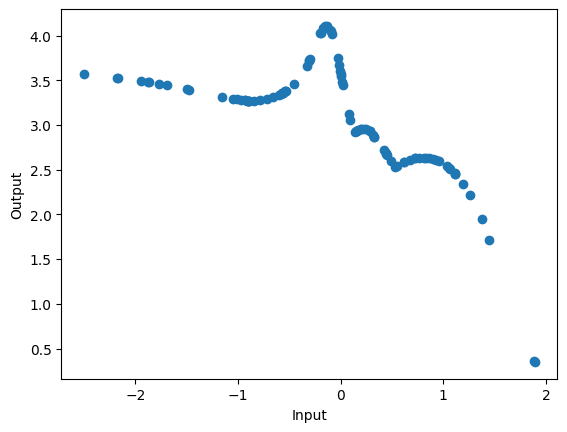

In [26]:
example = np.random.randn(100, 1)

network = Network()

network.add(FCLayer(1, 8))
network.add(ActivationLayer(relu))
network.add(FCLayer(8, 16))
network.add(ActivationLayer(tanh))
network.add(FCLayer(16, 1))
network.add(ActivationLayer(relu))

out = network.predict(example)

plt.scatter(example, out)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()